# Analyzing the San Francisco Bay Area Parking Census in Jupyter Notebooks



## Expected Outcomes for this Workshop

<ol>
<li>Load the data in Jupyter Notebooks and clean the data to prepare for analysis</li>
<li>Tabulate the data to quantify the different types of parking spaces across the SFBA</li>
<li>Calculate and visualize the amount of parking in San José as a case study</li>
</li>


### What is the SFBA Parking Census?

The census includes the amount of parking spaces in the San Francisco Bay Area. The parking census is the first database quantifying parking spaces in the nine-county Bay Area region.

The database allows users to quantify parking spatially and organize it by residential vs. non-residential and on-street vs.off-street. It's organized by block group ID.

The census can be downloaded here: https://ruilee16.github.io/sfba_parking/

To complete the workshop you will need to download all the files from the "parking spaces per acre" dataset.

# Part 1: Load the data in Jupyter Notebooks and clean the data to prepare for future analysis

### Import Python Packages 

Our first step is to install and import the Python libraries below

In [1]:
pip install geopandas # allows us to work with spatial data in python 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib import cm


In [3]:
# os allows you to see the working directory on your computer. It will direct you to the folder where you want to load the "parking spaces per acre" dataset.
import os
os.getcwd()

'/Users/ALT/TransForm Python + QGIS/SFBA Census'

In [4]:
os.listdir() # this allows you to create a list within the specific directory, Projects, that you are in 

['parking_density_acre.txt.xml',
 '.DS_Store',
 'schema.ini',
 'folder',
 'parking_density_acre.csv',
 'parking_density_acre.sbn',
 'parking_density_acre.prj',
 'parking_density_acre.dbf',
 'tl_2021_06_place',
 'table fields.txt',
 'tl_2019_06_bg',
 '.ipynb_checkpoints',
 'parking_density_acre.shp.xml',
 'Draft notebooks',
 'parking_density_acre.shx',
 'SFBA Parking Census Workshop.ipynb',
 'parking_density_acre.sbx',
 'parking_density_acre.cpg',
 'parking_density_acre.shp']

In [5]:
### Read in the CSV file 
#Name the CSV file "parking"
#read the blkgrid in as a string:a string is an ordered collection of characters 
parking = pd.read_csv("parking_density_acre.csv", dtype={'blkgrpid':str})
#dtype function is used to create a data type object. It defines how bytes in memory will be interpreted by a scalar or an array and the way in which the bytes will be treated

### Lets Examine our dateframe to make sure it looks like the file we want

In [6]:
#Display the first 5 rows of data 
parking.head()

,OID_,blkgrpid,on_acre,on_res_ac,on_nre_ac,off_acre,off_res_ac,off_nre_ac,re_acre,nonre_acre,all_acre,on_all,off_all,all_sp,off_res,off_nres,Shape_Leng,Shape_Area
0,0,060014001001,4.39,2.48,1.91,5.88,1.82,4.06,4.30,5.98,10.28,7483.3,10024.0,17507.3,3105.0,6919.0,0.144231,0.000706
1,1,060014002001,11.90,8.11,3.79,12.76,6.25,6.50,14.36,10.29,24.65,847.0,908.0,1755.0,445.0,463.0,0.031774,0.000029
2,2,060014002002,14.11,3.64,10.47,7.43,6.22,1.21,9.86,11.68,21.54,1040.6,548.0,1588.6,459.0,89.0,0.033831,0.000031
3,3,060014003001,10.44,5.71,4.72,8.61,7.20,1.40,12.92,6.13,19.04,685.3,565.0,1250.3,473.0,92.0,0.025534,0.000027
4,4,060014003002,16.91,10.41,6.50,15.24,10.88,4.36,21.29,10.85,32.14,1125.3,1014.0,2139.3,724.0,290.0,0.036617,0.000028


In [7]:
#Display the last 5 rows of data
parking.tail()

,OID_,blkgrpid,on_acre,on_res_ac,on_nre_ac,off_acre,off_res_ac,off_nre_ac,re_acre,nonre_acre,all_acre,on_all,off_all,all_sp,off_res,off_nres,Shape_Leng,Shape_Area
4741,4741,060971543031,0.56,0.56,0.0,0.05,0.04,0.01,0.60,0.01,0.61,15054.6,1335.0,16389.6,1181.0,154.0,1.247763,0.011265
4742,4742,060971543032,1.61,1.61,0.0,0.18,0.18,0.00,1.79,0.00,1.79,10015.5,1121.0,11136.5,1118.0,3.0,0.575204,0.002606
4743,4743,060971543041,0.38,0.38,0.0,0.00,0.00,0.00,0.38,0.00,0.38,68937.0,721.0,69658.0,545.0,176.0,1.758323,0.076115
4744,4744,060971543042,0.53,0.53,0.0,0.03,0.03,0.00,0.56,0.00,0.56,10422.5,555.0,10977.5,521.0,34.0,0.528839,0.008153
4745,4745,060971543043,0.32,0.32,0.0,0.05,0.04,0.01,0.37,0.01,0.37,6411.9,999.0,7410.9,869.0,130.0,0.792932,0.008311


In [8]:
#Lets rename the columns as a way to examine and define each column
parking.rename(columns={"OID_":"OID", #object ID
                "blkgrpid":"blkgrpid", # Block Group ID
                "on_acre":"on_ac", # on-street parking spaces per acre
                "on_res_ac":"on_res_ac", # on-street residential parking spaces per acre
                "on_nre_ac":"on_nres_ac", # on-street non-residential parking spaces per acre
                "off_acre":"off_acre", # off-street parking spaces per acre
                "off_res_ac":"off_res_ac", #off-street residential parking spaces per acre
                "off_nre_ac":"off_nres_ac", # off-street non-residential parking spaces per acre
                "re_acre":"res_ac", # residential spaces per acre
                "nonre_acre":"nonres_ac", # non-residential spaces per acre
                "all_acre":"all_ac", # all parking spaces per acre
                "on_all":"on_all", # all on-street parking spaces
                "off_all":"off_all", # all off-street parking spaces
                "all_sp":"all_sp", # all parking spaces
                "off_res":"off_res", # off-street residential spaces
                "off_nres":"off_nres", # off-street non-residential spaces
            }, inplace=True)
# inplace = True means it will return nothing and the dataframe is now updated. False returns a data frame with dropped rows 


In [9]:
# Lets review the dataframe to make sure it has the new named columns
parking.head()

,OID,blkgrpid,on_ac,on_res_ac,on_nres_ac,off_acre,off_res_ac,off_nres_ac,res_ac,nonres_ac,all_ac,on_all,off_all,all_sp,off_res,off_nres,Shape_Leng,Shape_Area
0,0,060014001001,4.39,2.48,1.91,5.88,1.82,4.06,4.30,5.98,10.28,7483.3,10024.0,17507.3,3105.0,6919.0,0.144231,0.000706
1,1,060014002001,11.90,8.11,3.79,12.76,6.25,6.50,14.36,10.29,24.65,847.0,908.0,1755.0,445.0,463.0,0.031774,0.000029
2,2,060014002002,14.11,3.64,10.47,7.43,6.22,1.21,9.86,11.68,21.54,1040.6,548.0,1588.6,459.0,89.0,0.033831,0.000031
3,3,060014003001,10.44,5.71,4.72,8.61,7.20,1.40,12.92,6.13,19.04,685.3,565.0,1250.3,473.0,92.0,0.025534,0.000027
4,4,060014003002,16.91,10.41,6.50,15.24,10.88,4.36,21.29,10.85,32.14,1125.3,1014.0,2139.3,724.0,290.0,0.036617,0.000028


### Understanding the Data

In the above code where we renamed the columns, you can see an explaination of the data each column contains. For the last 5 columns, that include parking space supply not averaged by acre, the columns have a relationship to eachother. These calculations are included below for your reference.

On_acre = on_res_ac + on_nre_ac

Off_acre = off_res_ac + off_nre_ac

Re_acre = on_res_ac + off_res_ac 

Nonre_acre =  on_nre_ac + off_nre_ac

All_sp = on_all + off_all

Off_all = off_res + off_nres


In [10]:
## Now we will run basic descriptive stats to get the mean, min, max, std
parking.describe()

,OID,on_ac,on_res_ac,on_nres_ac,off_acre,off_res_ac,off_nres_ac,res_ac,nonres_ac,all_ac,on_all,off_all,all_sp,off_res,off_nres,Shape_Leng,Shape_Area
count,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,2372.500000,10.219770,7.413266,2.806610,9.723192,6.751500,2.971702,14.164684,5.778291,19.943028,1819.107132,1345.670249,3164.777381,805.989043,539.681205,0.060949,0.000393
std,1370.196519,4.753017,4.009688,2.793706,9.080179,5.000727,7.759407,7.532399,9.016918,11.554960,3249.832460,2376.551126,4553.211026,568.260130,2274.697238,0.116949,0.003291
min,0.000000,-0.300000,-1.810000,0.000000,0.000000,0.000000,0.000000,-0.030000,0.000000,0.040000,-152.900000,0.000000,13.000000,0.000000,0.000000,0.005209,0.000002
25%,1186.250000,7.282500,4.600000,0.490000,4.982500,3.332500,0.010000,9.080000,1.330000,13.970000,682.000000,561.000000,1338.645000,429.250000,4.000000,0.023903,0.000026
50%,2372.500000,10.480000,7.440000,2.270000,8.390000,6.275000,0.520000,14.430000,3.520000,19.650000,1173.700000,903.500000,2193.150000,697.000000,68.000000,0.033526,0.000046
75%,3558.750000,13.147500,9.997500,4.150000,12.037500,9.030000,2.817500,18.767500,6.837500,24.817500,2011.625000,1428.750000,3518.850000,1068.000000,326.000000,0.051675,0.000092
max,4745.000000,36.090000,36.090000,21.380000,154.970000,59.530000,154.940000,69.270000,168.500000,169.700000,109459.900000,82876.000000,117139.900000,6007.000000,80544.000000,2.699449,0.156273


### What does this communicate to us? 

For on-street parking spaces per acre (on_ac) the average on street parking space per acre is 10.219770 thousand. 

The maximum on street acre parking is 36.09 thousands. 

The standard deviation on street parking space per acre is 4.745 thousand. The standard deviation allows us to measure the dispersion of a set amount of vales. If the standard deviation is low then that shows there is not that much dispersion around the set mean. If it is high then there is more dispersion around the set mean.  

High level real world example: If a teacher wants to see how well her math class performed even if the highest score was 98 and the mean was 89. She would look at the standard deviation. If the standard deviation was low that means most students scored around 89 (B+). Yet, if the standard deviation was high it would show there more a spread that could range from 79 - 91 ( C+ - A -). Now this is a simulated example but thats why the standard deviation is important because it helps see how well the data set performed around the mean.  


### Lets create a box plot to better visualize descriptive analysis above

Box plot helps visualize the described function above by displaying the mean, min, max, and quartiles. 

The results displayed will compute the same values that we just ran in the above function. 

Text(0.5, 1.0, 'Boxplot of On Street Residential Parking per Acre')

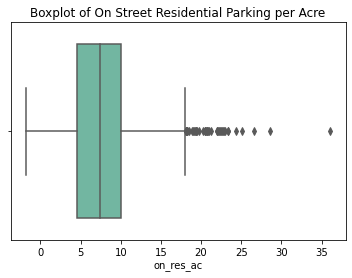

In [11]:
#box plot of residential parking per acre
on_res_bp = sns.boxplot( x=parking["on_res_ac"], palette="Set2") 
plt.title("Boxplot of On Street Residential Parking per Acre", loc="center")

Text(0.5, 1.0, 'Boxplot of On Street Non Residential Parking per Acre')

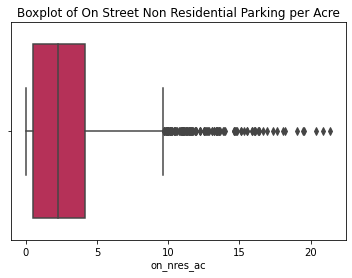

In [12]:
#box plot of non-residential parking per acre
#we can see the average amt of parking per acre for non-residential spaces is smaller with a smaller range than for residential spaces.
on_nonres_bp = sns.boxplot(x=parking["on_nres_ac"], palette="rocket")
plt.title("Boxplot of On Street Non Residential Parking per Acre",loc="center")

# Part 2: Tabulate the data to quantify the different types of parking spaces across the SFBA

### Create a sum of each column

Below we can see the sums of different types of parking spaces in the Bay Area. For example there are 8,633,482 on-street parking spaces. 

In [13]:
# Create a sum of each column

pd.set_option('display.float_format', lambda x: '%.3f' % x) # this setting removes the option of displaying numbers in scientific notation
parking.sum(axis=0, skipna = True)

OID                                                     11259885
blkgrpid       0600140010010600140020010600140020020600140030...
on_ac                                                  48503.030
on_res_ac                                              35183.360
on_nres_ac                                             13320.170
off_acre                                               46146.270
off_res_ac                                             32042.620
off_nres_ac                                            14103.700
res_ac                                                 67225.590
nonres_ac                                              27423.770
all_ac                                                 94649.610
on_all                                               8633482.450
off_all                                              6386551.000
all_sp                                              15020033.450
off_res                                              3825224.000
off_nres                 

## Creating a bar chart

To create a bar chart we will need to make a new dataframe using the totals we calculated above

In [14]:
Spaces = ['On-Street', 'Off-Street']
Bay_Area_ParkingTypes = [8633482, 6386551]


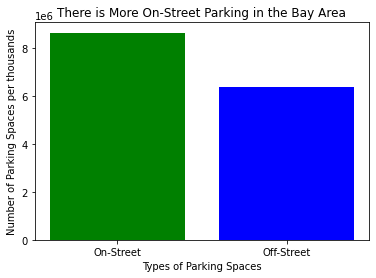

In [37]:
New_Colors = ['green', 'blue', 'purple', 'teal']

plt.bar(Spaces, Bay_Area_ParkingTypes, color=New_Colors) 
plt.title('There is More On-Street Parking in the Bay Area') #set the title
plt.xlabel('Types of Parking Spaces') # set the x-axis label
plt.ylabel('Number of Parking Spaces per thousands')
plt.savefig('plot.png', dpi=300) # save your figure
plt.show()

# Part 3: Calculate and visualize the amount of parking in San Jose as a case study

In [17]:
#os.listdir()

In [18]:
# Let's look at the data visually by uploading the shapefile to Python

# Read file using gpd.read_file()
parking_map = gpd.read_file('parking_density_acre.shp')

# Display the map
parking_map

,blkgrpid,on_acre,on_res_ac,on_nre_ac,off_acre,off_res_ac,off_nre_ac,re_acre,nonre_acre,all_acre,on_all,off_all,all_sp,off_res,off_nres,Shape_Leng,Shape_Area,geometry
0,060014001001,4.390,2.480,1.910,5.880,1.820,4.060,4.300,5.980,10.280,7483.300,10024.000,17507.300,3105.000,6919.000,0.144,0.001,"POLYGON ((-122.21320 37.85760, -122.21313 37.8..."
1,060014002001,11.900,8.110,3.790,12.760,6.250,6.500,14.360,10.290,24.650,847.000,908.000,1755.000,445.000,463.000,0.032,0.000,"POLYGON ((-122.24404 37.85026, -122.24409 37.8..."
2,060014002002,14.110,3.640,10.470,7.430,6.220,1.210,9.860,11.680,21.540,1040.600,548.000,1588.600,459.000,89.000,0.034,0.000,"POLYGON ((-122.24372 37.84851, -122.24550 37.8..."
3,060014003001,10.440,5.710,4.720,8.610,7.200,1.400,12.920,6.130,19.040,685.300,565.000,1250.300,473.000,92.000,0.026,0.000,"POLYGON ((-122.24540 37.84580, -122.24608 37.8..."
4,060014003002,16.910,10.410,6.500,15.240,10.880,4.360,21.290,10.850,32.140,1125.300,1014.000,2139.300,724.000,290.000,0.037,0.000,"POLYGON ((-122.25081 37.83713, -122.25084 37.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,060971543031,0.560,0.560,0.000,0.050,0.040,0.010,0.600,0.010,0.610,15054.600,1335.000,16389.600,1181.000,154.000,1.248,0.011,"MULTIPOLYGON (((-123.40847 38.65423, -123.4085..."
4742,060971543032,1.610,1.610,0.000,0.180,0.180,0.000,1.790,0.000,1.790,10015.500,1121.000,11136.500,1118.000,3.000,0.575,0.003,"MULTIPOLYGON (((-123.40615 38.65714, -123.4061..."
4743,060971543041,0.380,0.380,0.000,0.000,0.000,0.000,0.380,0.000,0.380,68937.000,721.000,69658.000,545.000,176.000,1.758,0.076,"POLYGON ((-123.26871 38.80837, -123.26881 38.8..."
4744,060971543042,0.530,0.530,0.000,0.030,0.030,0.000,0.560,0.000,0.560,10422.500,555.000,10977.500,521.000,34.000,0.529,0.008,"MULTIPOLYGON (((-123.12787 38.43937, -123.1274..."


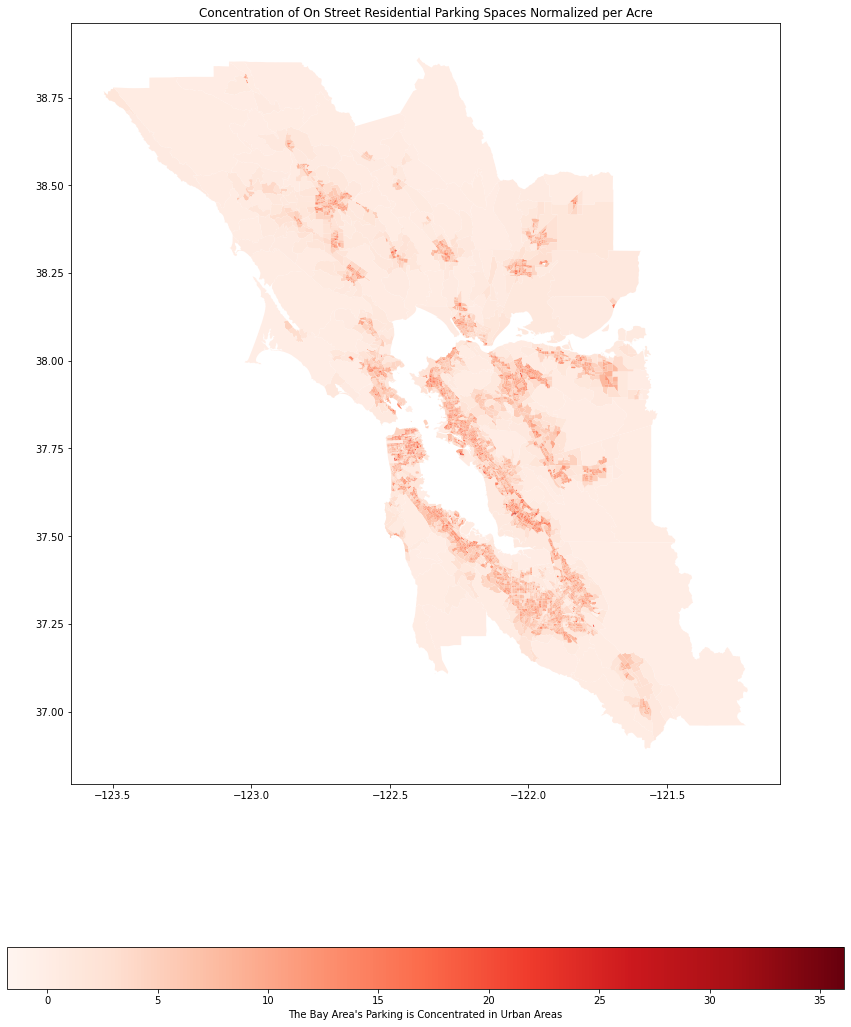

In [19]:
# Plot with data using a simple choropleth map 
fig, ax = plt.subplots(figsize = (15,20)) 

parking_map.plot(column='on_res_ac', 
              cmap='Reds',
              legend=True,
              legend_kwds={'label':"The Bay Area's Parking is Concentrated in Urban Areas",
                           'orientation': "horizontal"},
              ax=ax)


ax.set_title("Concentration of On Street Residential Parking Spaces Normalized per Acre")
plt.show()


### What if I just want to look at parking supply in a specific area?

Let's zoom in on Santa Clara County, home of San Jose.

#### To look at the parking census spatially we need to understand the block group ID

A block group ID is a geographic identifier determined by the US Government and used to collect data for the US Census. The entire United States in broken into different boundaries. These little geographic areas are used to organize the census results.

In the first row of data in the Census, the block group ID is 060014001001

The structure is as follows: 
* State [06]
* County [001]
* Tract [400100]
* Block group [1]

#### To isolate the block group IDs in Santa Clara County, we are interested in block group IDs that start with 06085. 

We know this because the state code for California is 06 and the County Code is 085.

If you wanted to isolate the supply in a different county, you can find the county codes here: https://www2.census.gov/geo/docs/reference/codes/files/st06_ca_cou.txt

In [20]:
# Isolate block group IDs in Santa Clara County (SCC) within the census by isolating block group IDs that begin with 06085
SCC_parking_map = parking_map[parking_map['blkgrpid'].str.contains('06085')]
SCC_parking_map

,blkgrpid,on_acre,on_res_ac,on_nre_ac,off_acre,off_res_ac,off_nre_ac,re_acre,nonre_acre,all_acre,on_all,off_all,all_sp,off_res,off_nres,Shape_Leng,Shape_Area,geometry
3002,060855001001,9.260,1.340,7.920,15.130,1.370,13.760,2.700,21.680,24.390,1756.700,2870.000,4626.700,259.000,2611.000,0.036,0.000,"POLYGON ((-121.89147 37.36290, -121.89143 37.3..."
3003,060855001002,12.840,4.800,8.030,10.380,9.310,1.070,14.110,9.100,23.210,864.600,699.000,1563.600,627.000,72.000,0.022,0.000,"POLYGON ((-121.88591 37.36233, -121.88596 37.3..."
3004,060855001003,13.420,4.420,9.000,6.970,6.790,0.180,11.210,9.180,20.390,1166.000,606.000,1772.000,590.000,16.000,0.033,0.000,"POLYGON ((-121.87745 37.36108, -121.87747 37.3..."
3005,060855001004,11.180,2.080,9.090,10.630,6.690,3.950,8.770,13.040,21.810,1464.100,1393.000,2857.100,876.000,517.000,0.031,0.000,"POLYGON ((-121.88934 37.35714, -121.88914 37.3..."
3006,060855002001,7.100,2.180,4.920,8.050,1.870,6.180,4.050,11.100,15.160,1595.000,1809.000,3404.000,420.000,1389.000,0.047,0.000,"POLYGON ((-121.90023 37.35487, -121.89991 37.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4071,060855126042,6.510,5.940,0.570,7.330,4.140,3.180,10.090,3.750,13.840,969.100,1091.000,2060.100,617.000,474.000,0.049,0.000,"POLYGON ((-121.55959 37.00982, -121.55970 37.0..."
4072,060855126043,13.220,7.230,5.990,9.770,4.150,5.620,11.380,11.610,22.990,611.600,452.000,1063.600,192.000,260.000,0.018,0.000,"POLYGON ((-121.57136 37.01260, -121.57126 37.0..."
4073,060855130001,1.960,1.960,0.000,0.010,0.010,0.000,1.970,0.000,1.970,1096.700,7.000,1103.700,7.000,0.000,0.083,0.000,"POLYGON ((-122.16019 37.43728, -122.16015 37.4..."
4074,060855130003,5.510,5.510,0.000,1.050,1.050,0.000,6.560,0.000,6.560,394.900,75.000,469.900,75.000,0.000,0.032,0.000,"POLYGON ((-122.14924 37.42769, -122.14949 37.4..."


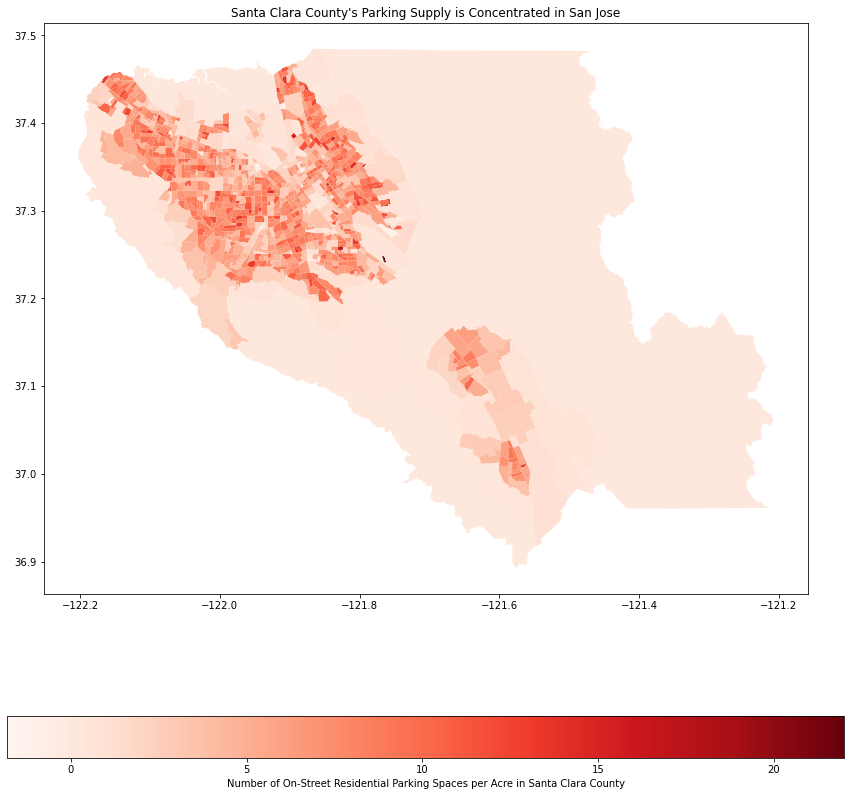

In [40]:
# Plot with data using a simple choropleth map 
#additional ways to use color here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
fig, ax = plt.subplots(figsize = (15,15)) 

SCC_parking_map.plot(column='on_res_ac', 
              cmap='Reds',
              legend=True,
              legend_kwds={'label':"Number of On-Street Residential Parking Spaces per Acre in Santa Clara County",
                           'orientation': "horizontal"},
              ax=ax)


ax.set_title("Santa Clara County's Parking Supply is Concentrated in San Jose")
plt.savefig('map.png', dpi=300, bbox_inches='tight') # save your figure
plt.show()

### Looking at the parking supply in San Jose

Isolating parking by city requires a different methodology than isolating via the block group ID becuase the block group ID's do not include digits to identify the city. 

Luckily, the federal government provides shapefiles for "places" which are usually very close to city boundaries. They can be downloaded here: https://www2.census.gov/geo/tiger/TIGER2021/PLACE/. 

We downloaded tl_2021_06_place.zip, for the state of California.

In [22]:
# Import the place boundary data
places = gpd.read_file("tl_2021_06_place/tl_2021_06_place.shp")

# Subset place boundary to San Jose (SJ)
SJ_gdf = places[places['NAME']=='San Jose'].copy().reset_index(drop=True)
SJ_gdf

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,68000,02411790,0668000,San Jose,San Jose city,25,C1,Y,N,G4110,A,461821936,8089813,+37.2960112,-121.8145519,"MULTIPOLYGON (((-121.75863 37.39953, -121.7570..."


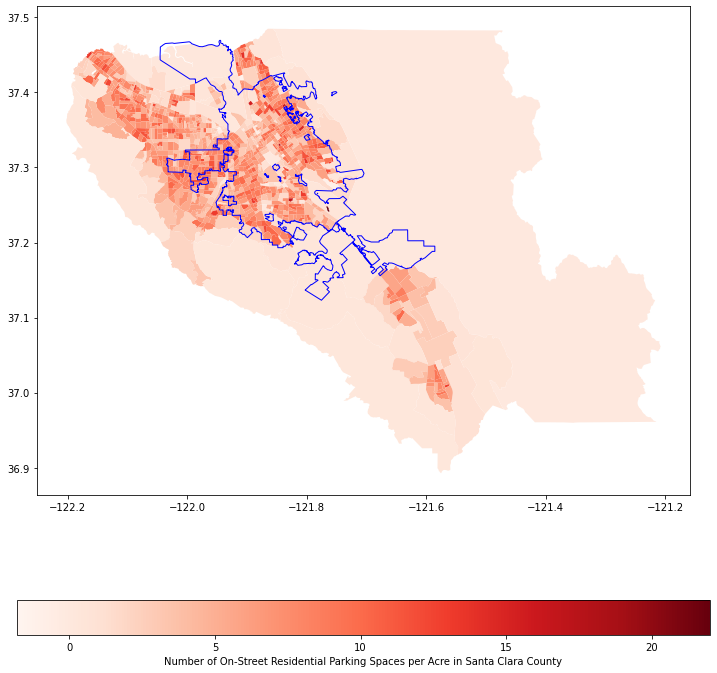

In [23]:
# Plot both shapefiles as choropleth
fig, ax = plt.subplots(figsize = (10,10)) 
SCC_parking_map.plot(column='on_res_ac',
              cmap="Reds",
              
              legend=True,
              legend_kwds={'label': "Number of On-Street Residential Parking Spaces per Acre in Santa Clara County",
                           'orientation': "horizontal"},
              ax=ax)

# Plot `SJ_gdf` outline
SJ_gdf.plot(ax=ax, color="none", edgecolor="Blue")

# Crop map to `SJ_gdf` bounds
# ax.set_xlim([SJ_gdf.bounds.loc[0, 'minx'], SJ_gdf.bounds.loc[0, 'maxx']])
# ax.set_ylim([SJ_gdf.bounds.loc[0, 'miny'], SJ_gdf.bounds.loc[0, 'maxy']])

# Display map
plt.tight_layout()
plt.show()

### What if we wanted to make a new dataframe to calculate the parking supply in San Jose?

We can use these shapefiles to clip the parking supply (sort of like using a cookie cutter in the kitchen) and create a new dataframe that only includes block group IDs in the city of San Jose. 

<ipython-input-24-f758b3bb0a6f>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4269

  SJ_parking_map = gpd.clip(SCC_parking_map, SJ_gdf)


<AxesSubplot:>

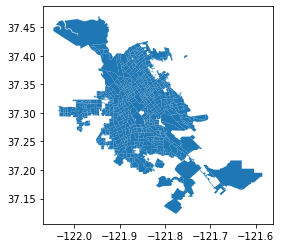

In [24]:
# Clip tracts by the City of San Jose
SJ_parking_map = gpd.clip(SCC_parking_map, SJ_gdf)

# Display output
SJ_parking_map.plot()

# the red warning error signifies that we have clipped the dataset

### This clip shows us the boundary of San Jose that includes the out of bound places that the census includes 

Not sure if this is right but would help provide a reason why this map is useful in the parking context

In [25]:
# We can see the new dataframe that includes all block group IDs in San Jose, ready for analysis.

SJ_parking_map

,blkgrpid,on_acre,on_res_ac,on_nre_ac,off_acre,off_res_ac,off_nre_ac,re_acre,nonre_acre,all_acre,on_all,off_all,all_sp,off_res,off_nres,Shape_Leng,Shape_Area,geometry
4022,060855122001,0.330,0.330,0.000,0.040,0.040,0.010,0.360,0.010,0.370,7873.800,1054.000,8927.800,846.000,208.000,0.636,0.010,"MULTIPOLYGON (((-121.76100 37.18145, -121.7608..."
4024,060855123051,2.120,2.120,0.000,1.150,1.090,0.060,3.210,0.060,3.270,4508.900,2454.000,6962.900,2323.000,131.000,0.144,0.001,"POLYGON ((-121.68000 37.15845, -121.67984 37.1..."
4036,060855123111,6.980,5.780,1.200,8.630,1.480,7.140,7.260,8.340,15.600,9579.900,11844.000,21423.900,2036.000,9808.000,0.106,0.001,"MULTIPOLYGON (((-121.67708 37.15598, -121.6770..."
4031,060855123083,3.310,3.310,0.000,1.040,1.010,0.030,4.310,0.030,4.340,5806.900,1823.000,7629.900,1769.000,54.000,0.148,0.001,"POLYGON ((-121.63238 37.16548, -121.63249 37.1..."
4021,060855121001,0.280,0.280,0.000,0.290,0.050,0.240,0.330,0.240,0.570,4007.300,4051.000,8058.300,655.000,3396.000,0.370,0.006,"MULTIPOLYGON (((-121.66861 37.16632, -121.6689..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,060855080042,12.060,10.770,1.300,20.160,20.160,0.000,30.920,1.300,32.220,1113.200,1860.000,2973.200,1860.000,0.000,0.024,0.000,"POLYGON ((-122.00292 37.31033, -122.00294 37.3..."
3688,060855080012,14.670,8.470,6.200,19.120,19.120,0.000,27.590,6.200,33.790,1442.100,1880.000,3322.100,1880.000,0.000,0.029,0.000,"POLYGON ((-122.02128 37.30951, -122.02149 37.3..."
3687,060855080011,10.430,3.750,6.670,17.420,13.580,3.830,17.340,10.500,27.840,2110.900,3526.000,5636.900,2750.000,776.000,0.052,0.000,"MULTIPOLYGON (((-122.01349 37.31041, -122.0136..."
3693,060855080041,12.240,11.970,0.270,22.190,20.700,1.490,32.670,1.760,34.430,1291.400,2341.000,3632.400,2184.000,157.000,0.026,0.000,"POLYGON ((-122.00081 37.32280, -122.00072 37.3..."


In [26]:
#create a sum of each column
SJ_parking_map.sum(axis=0, skipna = True)

blkgrpid      0608551220010608551230510608551231110608551230...
on_acre                                                6065.310
on_res_ac                                              4131.420
on_nre_ac                                              1934.040
off_acre                                               5900.260
off_res_ac                                             3978.580
off_nre_ac                                             1921.670
re_acre                                                8109.960
nonre_acre                                             3855.840
all_acre                                              11965.720
on_all                                               920815.500
off_all                                             1010109.000
all_sp                                              1930924.500
off_res                                              506847.000
off_nres                                             503262.000
Shape_Leng                              

In [27]:
# Creating a new dataframe
Spaces = ['On-Street', 'Off-Street']
SJ_ParkingTypes = [920816, 1010109]

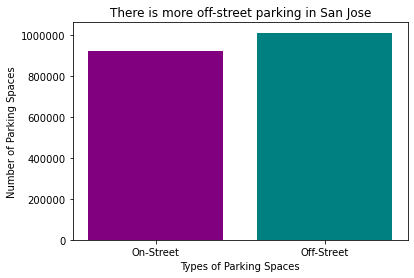

In [28]:
# Creating a new bar chart of San Jose parking supply

New_Colors = ['purple', 'teal']

plt.bar(Spaces, SJ_ParkingTypes, color=New_Colors)
plt.title('There is more off-street parking in San Jose')
plt.xlabel('Types of Parking Spaces')
plt.ylabel('Number of Parking Spaces')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) # remove scientific notation from the y-axis
plt.show()

### Calculating parking in a transit priority area

As introduced above, the data is organized by Block Group ID. So, we need to identify the block group ID numbers for the outlined geographies above.

To do this, we will start by looking at the federal government's map of Census Block Group ID geographies here: https://data.census.gov/cedsci/map?t=Commuting%3AEmployment&g=0500000US06085%241500000&mode=selection&vintage=2020&layer=VT_2020_150_00_PY_D1

The bold red text is the tract #. Within each tract # there are additional light red lines with single digits on them (1-4), that is the block group ID.

Let's say we wanted to isolate the parking supply outside Diridon station, a popular transit station in San Jose. I would need to identify the block group IDs that encompass the geographic area around Diridon Station using the link above. 

 IDs they are interested in.*

The Block Group IDs we will use to look at parking just around San Jose Diridon station are: 060855003001, 060855003002, 06085501901, 060855019021, 060855008001

In [29]:
# Tell python these are the Block Group IDs we are interested in
# Group them
# Subset data to only tracts in the Bay Area
SJ_parking = parking_map[(parking_map["blkgrpid"]=="060855003001")
                    | (parking_map["blkgrpid"]=="060855003002")
                    | (parking_map["blkgrpid"]=="060855019001") #OID 3067 in dataset - confirm with Rui why this doesn't match the tract + block group ID structure
                    | (parking_map["blkgrpid"]=="060855019002") #OID 3068 same
                    | (parking_map["blkgrpid"]=="060855008002")
                    | (parking_map["blkgrpid"]=="060855008001")].copy().reset_index(drop=True)
# Display SJ_Parking
SJ_parking

,blkgrpid,on_acre,on_res_ac,on_nre_ac,off_acre,off_res_ac,off_nre_ac,re_acre,nonre_acre,all_acre,on_all,off_all,all_sp,off_res,off_nres,Shape_Leng,Shape_Area,geometry
0,060855003001,5.630,2.260,3.370,8.240,0.470,7.760,2.730,11.130,13.860,3129.500,4583.000,7712.500,264.000,4319.000,0.072,0.000,"POLYGON ((-121.90920 37.35048, -121.90904 37.3..."
1,060855003002,8.820,4.390,4.430,10.600,6.260,4.340,10.650,8.770,19.420,1463.000,1757.000,3220.000,1038.000,719.000,0.036,0.000,"POLYGON ((-121.90019 37.32661, -121.90027 37.3..."
2,060855008001,9.950,3.280,6.680,110.450,0.360,110.100,3.630,116.770,120.410,2228.600,24733.000,26961.600,80.000,24653.000,0.050,0.000,"POLYGON ((-121.89057 37.33617, -121.89050 37.3..."
3,060855008002,7.640,3.880,3.760,8.240,1.980,6.270,5.860,10.030,15.890,1458.600,1573.000,3031.600,377.000,1196.000,0.053,0.000,"POLYGON ((-121.89217 37.32375, -121.89232 37.3..."
4,060855019001,8.270,2.920,5.350,13.820,2.870,10.950,5.790,16.300,22.090,2418.900,4043.000,6461.900,839.000,3204.000,0.048,0.000,"POLYGON ((-121.90223 37.31870, -121.90238 37.3..."
5,060855019002,9.820,4.990,4.830,5.450,4.230,1.220,9.220,6.050,15.270,878.900,488.000,1366.900,379.000,109.000,0.028,0.000,"POLYGON ((-121.90414 37.31262, -121.90432 37.3..."


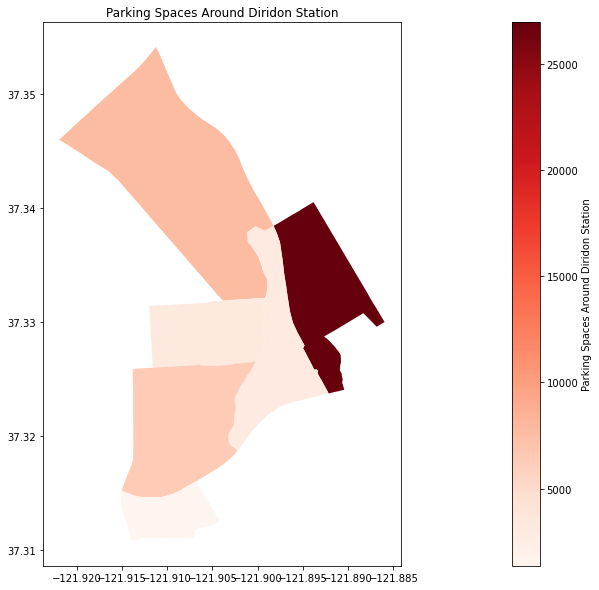

In [30]:
# Plot SJ data as choropleth
fig, ax = plt.subplots(figsize = (40,10)) 
SJ_parking.plot(column='all_sp', 
              cmap='Reds',
              legend=True,
              legend_kwds={'label': "Parking Spaces Around Diridon Station",
                           'orientation': "vertical"},
              ax=ax)
 
#SJ_parking.plot(ax=ax, color="none", edgecolor="none") # putting an edgecolor 

ax.set_title("Parking Spaces Around Diridon Station")
plt.show()

### This data isn't very helpful as a map, but what if we tabulated the amount of parking around Diridon station?

In [31]:
#create a sum of each column
SJ_parking.sum(axis=0, skipna = True)

blkgrpid      0608550030010608550030020608550080010608550080...
on_acre                                                  50.130
on_res_ac                                                21.720
on_nre_ac                                                28.420
off_acre                                                156.800
off_res_ac                                               16.170
off_nre_ac                                              140.640
re_acre                                                  37.880
nonre_acre                                              169.050
all_acre                                                206.940
on_all                                                11577.500
off_all                                               37177.000
all_sp                                                48754.500
off_res                                                2977.000
off_nres                                              34200.000
Shape_Leng                              

In [32]:
#creating a new dataframe
Spaces = ['On-Street', 'Off-Street']
SJ_DiridonParkingTypes = [11576,37177]

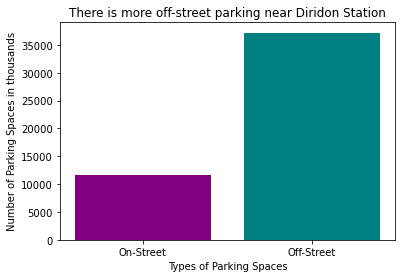

In [33]:
# creating a bar plot for the Diridon Parking Types
New_Colors= ['purple', 'teal']

plt.bar(Spaces,SJ_DiridonParkingTypes,color=New_Colors )
plt.title('There is more off-street parking near Diridon Station')
plt.xlabel('Types of Parking Spaces')
plt.ylabel('Number of Parking Spaces in thousands')
plt.show()


# End of the Road: Thanks for coming along on our journey! 

We hope this workshop is valuable to your work and assists in parking census data analysis!